An overview of nanopore sequencing data and fast5 format.

Example datasets also used for DeepNano:

http://www.ebi.ac.uk/ena/data/view/ERR1147230 (236GB in .tar, 252GB extracted) used in the rest of examples

https://www.ebi.ac.uk/ena/data/view/SAMEA3713789

Extracted structure in MAP006-PCR-2/ :  
logs / telemetry.log  
MAP006-PCR-2_raw / nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1.fast5 (contains raw data for sequencing run) 
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch{X}_file{Y}_strand.fast5 (raw data segmented into events and split into reads)
nanopore2_Ecoli_K12_MG1655_PCR_20150928_3624_1_ch{X}_file{Y}_strand.fast5

ch{X}_file{Y} part describes where was that particular read made, channels are individual nanopore pores and file is the ordinal number of read on the pore.

Be aware that not all channels are present in the segmented reads nor are file numbers always full sequences, likely due to bad reads, bad pores and data loss.

In [1]:
# path to folder MAP006-PCR-2
path = './MAP006-PCR-2/'

In [2]:
import sys
import os

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

_fast5_ format is _hdf5_ but with predefined attribute paths.
Python module _h5py_ is useful for working with _fast5_ but there are some issues.

Lets explore fast5 files a bit: 

In [3]:
import h5py

In [4]:
file = path + 'nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file1_strand.fast5'

h5 = h5py.File(file, 'r')

def crawl_hdf5(h5, path):
    try:
        for k in h5[path].keys():
            crawl_hdf5(h5, path + '/' + k)
    except:
        print('{} : No keys'.format(path))
    try:
        for k in h5[path].attrs.keys():
            val = h5[path].attrs[k]
            print('{} {} : {}'.format(path, k, val))
    except:
        print('{} : No attrs'.format(path))

crawl_hdf5(h5, '/')

//Analyses/EventDetection_000/Configuration/abasic_detection min_sample_size : 70
//Analyses/EventDetection_000/Configuration/abasic_detection max_sample_size : 200
//Analyses/EventDetection_000/Configuration/abasic_detection threshold_factor : 3.6
//Analyses/EventDetection_000/Configuration/abasic_detection first_peak_min_length : 5
//Analyses/EventDetection_000/Configuration/abasic_detection secondary_peak_min_length : 1
//Analyses/EventDetection_000/Configuration/abasic_detection secondary_peak_factor : 0.8
//Analyses/EventDetection_000/Configuration/abasic_detection secondary_peak_factor_relative_to_median : 0
//Analyses/EventDetection_000/Configuration/abasic_detection must_go_below_median_before : 0
//Analyses/EventDetection_000/Configuration/event_detection mode : b'multittest_continuous'
//Analyses/EventDetection_000/Configuration/event_detection peak_detector : b'highland'
//Analyses/EventDetection_000/Configuration/event_detection threshold : 4.39
//Analyses/EventDetection_00

Notable properties:  
/Analyses/EventDetection_000/Reads/Read_1/Events - are segmented events, but ...

In [5]:
reads = h5['Analyses/EventDetection_000/Reads']
events = reads[list(reads.keys())[0] + '/Events']
events.value[0:10]

array([(986368, 11, -1.8465585368373295e-129, 2.093092619037196e-308),
       (197568495616, 1762803969, 10.199734254628062, 4.873587e-318),
       (10145709241399246864, 1079330700, 2.0932241816878554e-308, 4.45619116103e-313),
       (4636698001337409864, 924849625, 4.87377e-318, -1.4586899037379293e-244),
       (14889400165920760836, 1069166908, 4.6683907401e-313, 100.57283402876422),
       (4618092571471383577, 986494, 2.6524181790477224e+94, 8.187232804352506e+254),
       (4237123751038764, 0, 113.04107982113487, 2.17804215746878),
       (986627, 7, -1.1217107614128067e-225, 2.093633725543666e-308),
       (111669149696, 528611359, 0.9143943625601086, 4.87475e-318),
       (12543785973214871573, 1079939997, 2.0937334588010025e-308, 3.60739284464e-313)], 
      dtype={'names':['start','length','mean','variance'], 'formats':['<u8','<u4','<f8','<f8'], 'offsets':[0,8,16,24], 'itemsize':32})

... it is a mess, it doesn't convert bytes into values properly, so ...

In [6]:
import pandas as pd

In [7]:
h5pd = pd.read_hdf(file)
h5pd.head(10)

,start,length,mean,variance
0,986368,11,72.206137,42.466786
1,986379,46,60.358838,10.199734
2,986425,16,85.117953,9.809859
3,986441,21,99.441655,3.178595
4,986462,10,101.562778,0.102314
5,986472,22,100.572834,5.690162
6,986494,38,107.517415,3.601159
7,986532,95,113.041080,2.178042
8,986627,7,116.712778,1.655426
9,986634,26,119.380867,0.914394


Much better!!!

So, use h5py to crawl through fast5 files, but read in events with pandas!

Now, lets look at raw data.

In [8]:
raw_file = path + 'MAP006-PCR-2_raw/nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1.fast5'

h5 = h5py.File(raw_file, 'r')

# You may not want to do this
# crawl_hdf5(h5, '/')

Notable stuff to look at is:  
IntermediateData/Channel\_{X}  (channel no is 1-512)  
Raw/Channel\_{X}  
StateData/Channel\_{X}  
Sequences/Meta  
UniqueGlobalKey  

In [9]:
crawl_hdf5(h5, 'IntermediateData/Channel_1')
crawl_hdf5(h5, 'Raw/Channel_1')
crawl_hdf5(h5, 'StateData/Channel_1')
crawl_hdf5(h5, 'Sequences')
crawl_hdf5(h5, 'UniqueGlobalKey')

IntermediateData/Channel_1/Events : No keys
IntermediateData/Channel_1/Meta description : [b'G' b'r' b'o' b'u' b'p' b'e' b'r']
IntermediateData/Channel_1/Meta range : 1170.68
IntermediateData/Channel_1/Meta digitisation : 8192.0
IntermediateData/Channel_1/Meta offset : 2.0
IntermediateData/Channel_1/Meta sample_rate : 3012.0
IntermediateData/Channel_1/Meta threshold : 0.0
IntermediateData/Channel_1/Meta window : 0
IntermediateData/Channel_1/Meta elimit : 0.0
IntermediateData/Channel_1/Meta smallest_event : 0.0
IntermediateData/Channel_1/Meta scaling_used : 1
IntermediateData/Channel_1/Reads : No keys
Raw/Channel_1/Meta description : [b'G' b'r' b'o' b'u' b'p' b'e' b'r']
Raw/Channel_1/Meta digitisation : 8192.0
Raw/Channel_1/Meta sample_rate : 3012.0
Raw/Channel_1/Meta range : 1170.68
Raw/Channel_1/Meta offset : 2.0
Raw/Channel_1/Signal : No keys
StateData/Channel_1/States : No keys
Sequences/Meta version : [b'F' b'A' b'S' b'T' b'4' b':' b'2']
Sequences/Meta tool : [b'O' b'N' b'T' b'F' b

In [10]:
reads = h5['IntermediateData/Channel_1/Reads']
print(len(reads.value))
reads.value[0:1] # This is ... something

15164


array([ (b'1631c1b7-9e05-44ad-bcc7-2b5c5f52d8dd', 24913152, 13568, 256, 0, 0, 65536, 0, 0, 2.172923696652e-311, 3.957106050941525e+95, 3.16e-322, -1.224388682507918e+242, -7.558120001110928e+268, 3.16e-322, 3.957106050941525e+95, 3.16e-322, -1.224388682507918e+242, -7.558120001110928e+268, 3.16e-322, 0, 0, 0, 0.0, 0, -7.127570363975295e-46, -7.127570370533966e-46, 6.491232602686368e+169, 1.7117600158827848e-52)], 
      dtype={'names':['read_id','event_index_start','event_index_end','read_start','read_length','classification','pen_classification','modal_classification','current_well_id','local_median','local_median_before','local_median_sd','local_median_dwell','local_range','median','median_before','median_sd','median_dwell','range','drift','feature','flags','abasic_event_index','abasic_peak_height','hairpin_event_index','hairpin_peak_height','hairpin_polyt_level','read_mean_min','read_mean_max'], 'formats':['S37','<u4','<u4','<u8','<u4','<i4','<i4','<i4','<u4','<f8','<f8','<f8','<f8'

In [11]:
states = h5['StateData/Channel_1/States']
print(len(states))
states.value # Also ... something

1482


array([(0, 200), (6000, 1), (9000, 2), ..., (250536000, 2), (259635000, 0),
       (259725000, 1)], 
      dtype=[('approx_raw_index', '<u8'), ('summary_state', '<i4')])

### And now, dun dun dun

In [12]:
signal = h5['Raw/Channel_1/Signal']
print(signal.shape)
signal.value

(261012672,)


array([558, 545, 559, ...,  -5,  -1,  -5], dtype=int16)

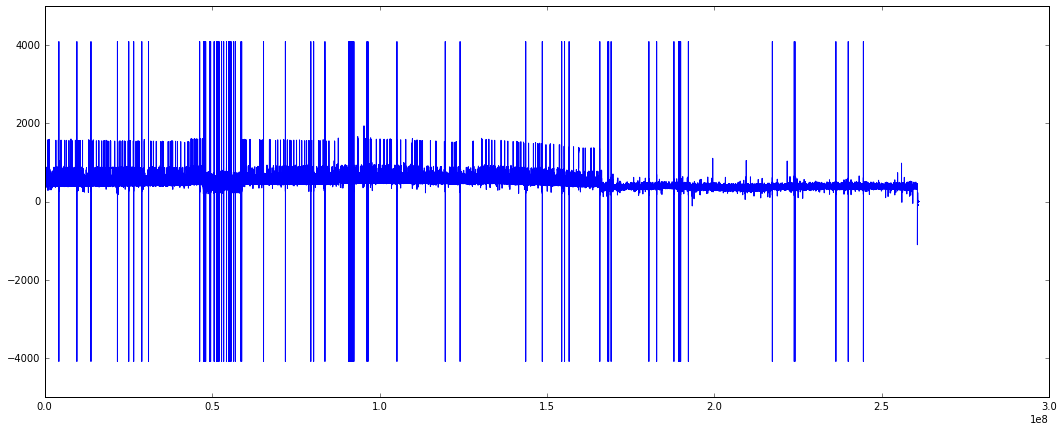

In [13]:
plt.figure(figsize=(18,7))
plt.plot(np.arange(signal.shape[0]), signal)
plt.show()

### Lets clean that up a bit.

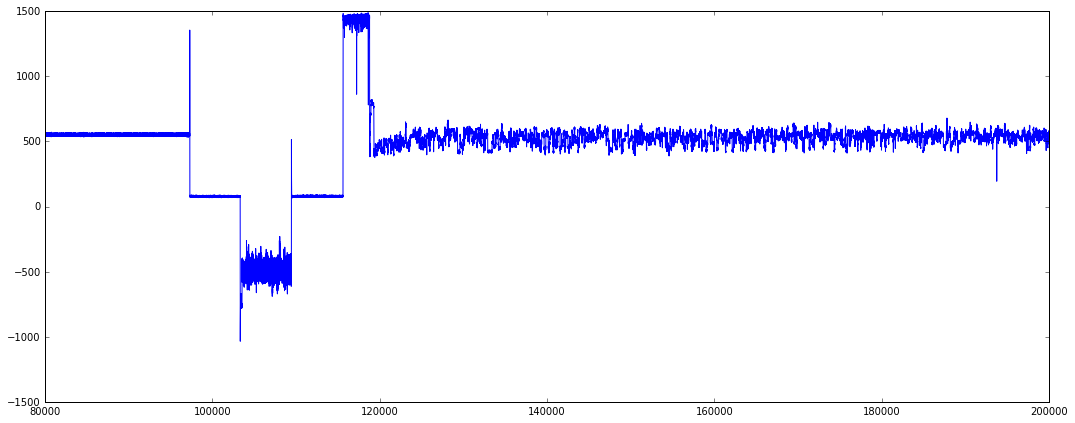

In [14]:
plt.figure(figsize=(18,7))
sbounds = (80000, 200000)
plt.plot(np.arange(*sbounds), signal[sbounds[0]:sbounds[1]])
plt.show()

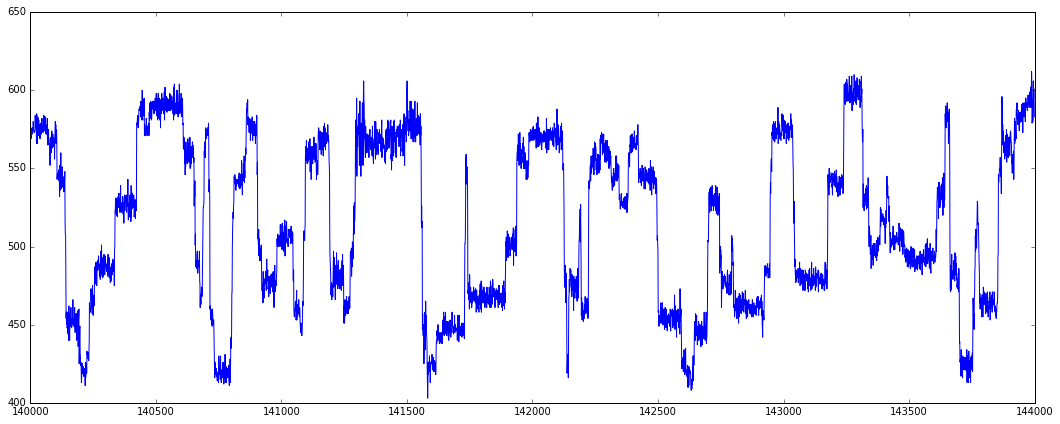

In [15]:
plt.figure(figsize=(18,7))
sbounds = (140000, 144000)
plt.plot(np.arange(*sbounds), signal[sbounds[0]:sbounds[1]])
plt.show()

### A bit better, but still, lets see whats really going on.

In [16]:
file = path + 'nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file1_strand.fast5'
events = pd.read_hdf(file)
events.head()

,start,length,mean,variance
0,986368,11,72.206137,42.466786
1,986379,46,60.358838,10.199734
2,986425,16,85.117953,9.809859
3,986441,21,99.441655,3.178595
4,986462,10,101.562778,0.102314


### Lets mark events on raw signal.

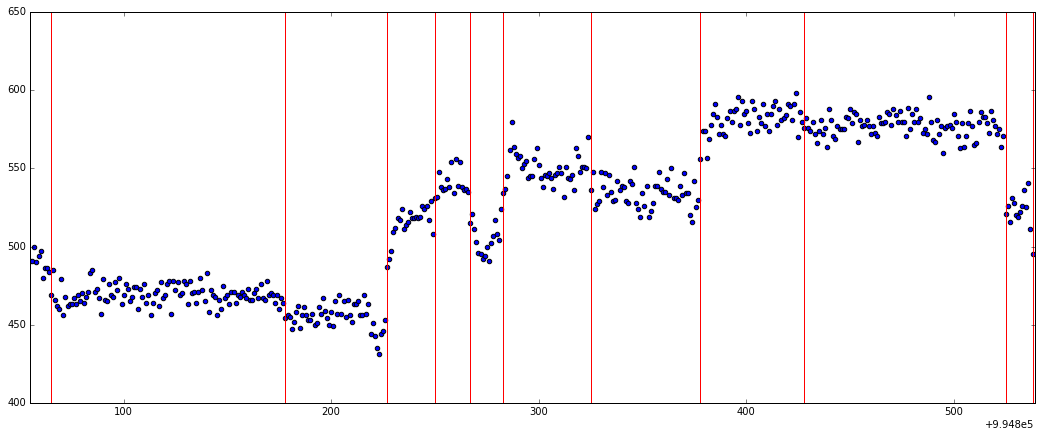

,start,length,mean,variance
3366,1124033,38,79.560631,1.578597
3367,1124071,26,75.179167,3.100869
3368,1124097,54,84.941307,0.780130
3369,1124151,14,84.457017,0.434695
3370,1124165,37,83.116797,127.917758


In [27]:
xlim = (int(events.iloc[200]['start']-10),
        int(events.iloc[210]['start']+1))
plt.figure(figsize=(18, 7))
plt.xlim(xlim)
plt.scatter(np.arange(xlim[0], xlim[1]), signal[xlim[0]:xlim[1]])
plt.axvline(int(events.iloc[200]['start']), c='r')
for x in events.iloc[200:211].values:
    plt.axvline(x[0] + x[1], c='r')
plt.show()
events.tail()

In [18]:
file2 = path + 'nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file2_strand.fast5'
events2 = pd.read_hdf(file2)
events2.head()

,start,length,mean,variance
0,1125494,15,76.854456,246.482193
1,1125509,10,63.278455,25.420386
2,1125519,30,88.887080,8.481903
3,1125549,11,106.893145,6.241681
4,1125560,43,110.233140,0.419859


### Lets see what happens between two strands.

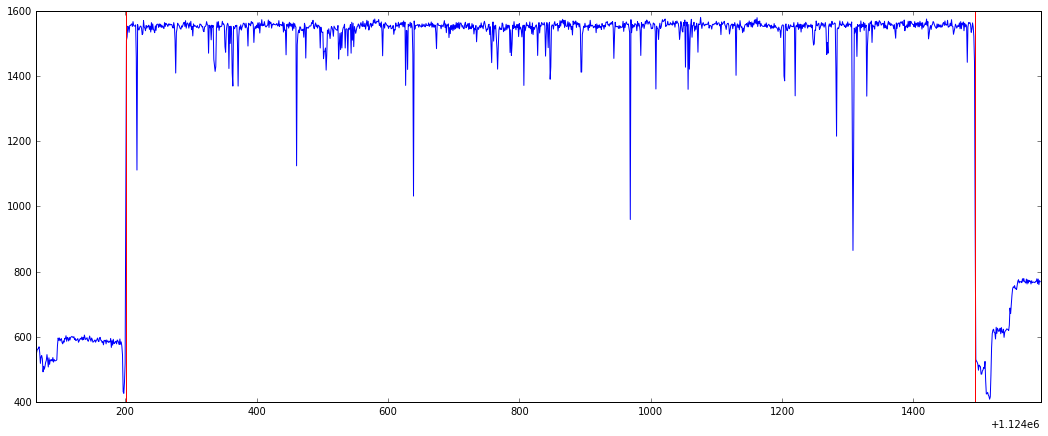

In [19]:
xlim = (int(events.iloc[-1]['start']-100), int(events2.iloc[0]['start']+100))
plt.figure(figsize=(18, 7))
plt.xlim(xlim)
plt.plot(np.arange(xlim[0], xlim[1]), signal[xlim[0]:xlim[1]])
plt.axvline(events2.iloc[0]['start'], c='r')
plt.axvline(events.iloc[-1]['start']+events.iloc[-1]['length'], c='r')
plt.show()

### Lets see how the signal breaks into strands.

nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file22_strand.fast5  Events: 392  Length: 18826.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file169_strand.fast5  Events: 18816  Length: 1468854.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file162_strand.fast5  Events: 14851  Length: 1313823.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file154_strand.fast5  Events: 9182  Length: 543014.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file81_strand.fast5  Events: 5530  Length: 308644.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file47_strand.fast5  Events: 14512  Length: 681435.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file63_strand.fast5  Events: 5613  Length: 264066.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file136_strand.fast5  Events: 8676  Length: 647938.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file18_strand.fast5  Events: 4093  Length: 188153.0
nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file127_strand.

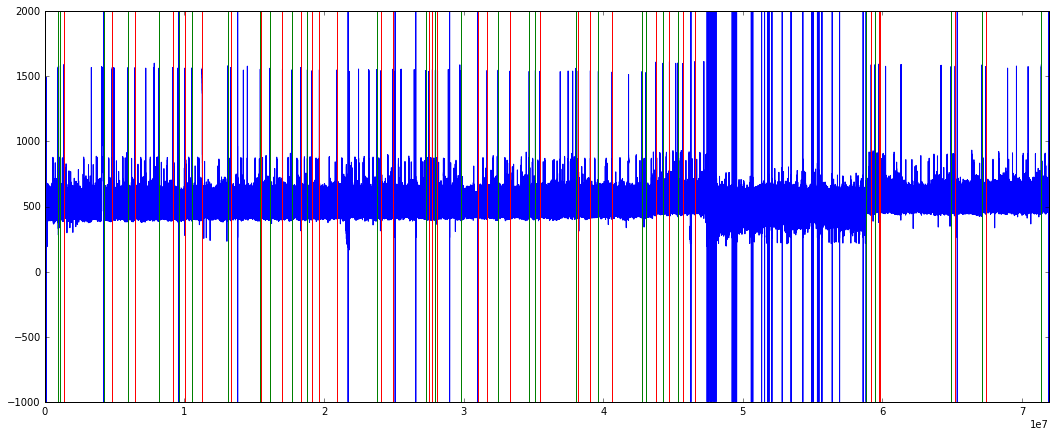

In [29]:
channel = '1'

channel_strands = [ x for x in os.listdir(path) 
                     if x.startswith('nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch{}_'.format(channel))]
raw_file = path + 'MAP006-PCR-2_raw/nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1.fast5'

h5 = h5py.File(raw_file, 'r')
signal = h5['Raw/Channel_{}/Signal'.format(channel)]

plt.figure(figsize=(18, 7))
vals = np.clip(signal, -1000, 2000)
plt.plot(np.arange(vals.shape[0]), vals)
xlim = (0, vals.shape[0])
bounds = []
for strand in channel_strands:
    evs = pd.read_hdf(path + strand)
    print("{}  Events: {}  Length: {}".format(strand, evs.shape[0],
                                             evs.iloc[-1]['start'] + evs.iloc[-1]['length']
                                             - evs.iloc[0]['start']))
    bounds.append([evs.iloc[0]['start'],evs.iloc[-1]['start'] + evs.iloc[-1]['length']])
    plt.axvline(evs.iloc[0]['start'], c='g')
    plt.axvline(evs.iloc[-1]['start'] + evs.iloc[-1]['length'], c='r')
    xlim = (0, evs.iloc[-1]['start'] + evs.iloc[-1]['length'])
plt.xlim(xlim)
plt.show()

In [21]:
for i, b in enumerate(bounds):
    for j in range(i+1, len(bounds)):
        if b[0] > bounds[j][0] and b[0] < bounds[j][1]:
            print("Overlap1 {} {}".format(i, j))
        if b[1] > bounds[j][0] and b[1] < bounds[j][1]:
            print("Overlap2 {} {}".format(i, j))
        if b[0] < bounds[j][0] and b[1] > bounds[j][0]:
            print("Overlap3 {} {}".format(i, j))

Nice, seems like the data is clean and strands do not overlap, as it should be.

Lets study events a bit more now, they are described with  
_(start, length, mean, variance)_  
Start is not really important so we may discard it, but mean and variance are not what they seem.
Different pores at different times have different scaling parameters for mean and variance, unfortunately.

## Pore models

Pore models (depend on chemistry used) define parameter distributions for each possible 6-mer context with a gaussian distribution for event mean, and inverse gaussian for event stdv (4 params per 6-mer context).

Additionally different pores at different times have different scaling properties. (scale, shift, drift, var, scale' and var')

See: _Nanocall: An Open Source Basecaller for Oxford Nanopore Sequencing Data_  
Source: https://github.com/mateidavid/nanocall (C++)

mean<sub>i</sub> ∼ N (scale · µ<sub>k</sub> + shift + drift · start<sub>i</sub>,
(var · σ<sub>k</sub>)<sup>2</sup>)


stdv<sub>i</sub> ∼ IG (scale’ · η<sub>k</sub>, var’ · γ<sub>k</sub>).


Pore models are used by Metrichor to assign probable 6mers to events in its HMM.


If a basecaller does not rely on pore models, scaling parameters are still be of some concern.  
MEAN<sub>i</sub> = scale · mean<sub>i</sub> + shift + drift · start<sub>i</sub>  
STDV<sub>i</sub> = scale’ · stdv<sub>i</sub>  

Interesting observation:  
MEAN<sub>i+1</sub> - MEAN<sub>i</sub> = scale · (mean<sub>i+1</sub> - mean<sub>i</sub>) + drift · length<sub>i</sub>  
drift · length<sub>i</sub> should be negligible, so only scale and scale' remain as parameters

Metrichor estimates these values as well, and some use them for pre-processing events for custom basecallers.  
See: _DeepNano: Deep Recurrent Neural Networks for Base Calling in MinION Nanopore Reads_  
Source: https://bitbucket.org/vboza/deepnano (python)

In [22]:
# Code from DeepNano that estimates scaling parameters

def get_scaling_template(events, has_std):
    down = 48.4631279889
    up = 65.7312554591
    our_down = np.percentile(events["mean"], 10)
    our_up = np.percentile(events["mean"], 90)
    scale = (our_up - our_down) / (up - down)
    shift = (our_up / scale - up) * scale

    sd = 0.807981325017
    if has_std:
        return scale, np.percentile(events["stdv"], 50) / sd, shift # scale, scale', shift
    else:
        return scale, np.sqrt(np.percentile(events["variance"], 50)) / sd, shift

def get_scaling_complement(events, has_std):
    down = 49.2638926877
    up = 69.0192568072
    our_down = np.percentile(events["mean"], 10)
    our_up = np.percentile(events["mean"], 90)
    scale = (our_up - our_down) / (up - down)
    shift = (our_up / scale - up) * scale

    sd = 1.04324844612
    if has_std:
        return scale, np.percentile(events["stdv"], 50) / sd, shift
    else:
        return scale, np.sqrt(np.percentile(events["variance"], 50)) / sd, shift

## Hairpin

Hairpin is a linking protein that connects template and complement. How one can estimate its presence and location is described in aforementioned _Nanocall_ but it is based on high mean events that are not related to regular 6mers.  
Here is hairpin locating code used in _DeepNano_ that more or less implements _Nanocall_ description:

In [23]:
def template_complement_loc(events):
    abasic_level = np.percentile(events["mean"], 99) + 5
    abasic_locs = (events["mean"] > abasic_level).nonzero()[0]
    last = -47 # previous abasic
    run_len = 1 # number of consecutive abasics
    runs = []
    for x in abasic_locs:
        if x - last == 1: # if two abasics are consecutive
            run_len += 1
        else:
            if run_len >= 5:
                if len(runs) and last - runs[-1][0] < 50: # last abasic is within 50 samples of previous runs end
                    run_len = last - runs[-1][0]
                    run_len += runs[-1][1]
                    runs[-1] = (last, run_len) # merge into previous run
                else:
                    runs.append((last, run_len))
            run_len = 1
        last = x
    to_sort = []
    mid = len(events) / 2
    low_third = len(events) / 3
    high_third = len(events) / 3 * 2
    for r in runs: # checks if candidate run is close to the half of the read (eventwise)
        if r[0] < low_third:
            continue
        if r[0] > high_third:
            continue
        to_sort.append((abs(r[0] - mid), r[0] - r[1], r[0]))
        # (distance of run end to read midpoint (eventwise), run start idx - 1, run end idx)
    to_sort.sort() # closest to the middle of event sequence
    if len(to_sort) == 0:
        return None
    trim_size = 10
    return {"temp": (trim_size, to_sort[0][1] - trim_size), # skip 10 at start, and 10 before hairpin
          "comp": (to_sort[0][2] + trim_size, len(events) - trim_size)}

Lets try to find a hairpin!

Hairpin in strand : nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch1_file169_strand.fast5 (18816, 95)


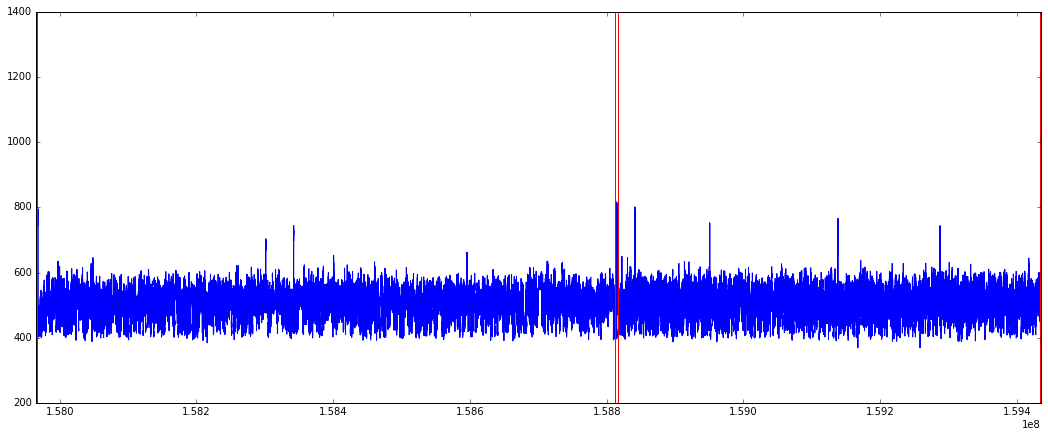

In [24]:
channel = '1'

channel_strands = [ x for x in os.listdir(path) 
                     if x.startswith('nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1_ch{}_'.format(channel))]
raw_file = path + 'MAP006-PCR-2_raw/nanopore2_Ecoli_K12_MG1655_PCR_20150928_1459_1.fast5'

h5 = h5py.File(raw_file, 'r')
signal = h5['Raw/Channel_{}/Signal'.format(channel)]

for strand in channel_strands:
    evs = pd.read_hdf(path + strand)
    locs = template_complement_loc(evs)
    if locs is not None:
        temp = locs['temp']
        comp = locs['comp']
        idx = (evs.iloc[temp[0]], evs.iloc[temp[1]], evs.iloc[comp[0]], evs.iloc[comp[1]])
        print('Hairpin in strand : {} ({}, {})'.format(strand, evs.shape[0], comp[0]-temp[1]+20))
        break

if locs is None:
    print('Failed to find a hairpin.')
xlim = (int(evs.iloc[0]['start']-100), int(evs.iloc[-1]['start']+evs.iloc[-1]['length']+100))
plt.figure(figsize=(18, 7))
plt.xlim(xlim)
plt.plot(np.arange(xlim[0], xlim[1]), signal[xlim[0]:xlim[1]])
plt.axvline(idx[0]['start'], c='r')
plt.axvline(idx[1]['start'] + idx[1]['length'], c='r')
plt.axvline(idx[2]['start'], c='r')
plt.axvline(idx[3]['start'] + idx[3]['length'], c='r')
plt.show()

Zoom in!

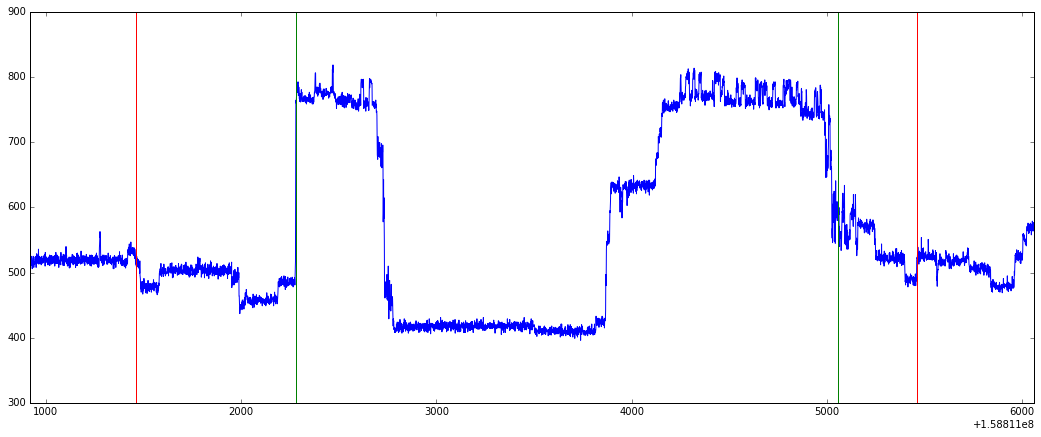

In [25]:
idx = (evs.iloc[temp[1]], evs.iloc[temp[1]+11], evs.iloc[comp[0]-10], evs.iloc[comp[0]])

xlim = (int(idx[0]['start']-500), int(idx[3]['start']+idx[3]['length']+500))
plt.figure(figsize=(18, 7))
plt.xlim(xlim)
plt.plot(np.arange(xlim[0], xlim[1]), signal[xlim[0]:xlim[1]])
plt.axvline(idx[0]['start'] + idx[0]['length'], c='r')
plt.axvline(idx[1]['start'], c='g')
plt.axvline(idx[2]['start'] + idx[0]['length'], c='g')
plt.axvline(idx[3]['start'], c='r')
plt.show()

## In conclusion

Segmenting reads into events and into template complement is mostly solved. Issues arise when the segmenter tries to enforce 6mers and it guesses how to split longer unchanging periods into separate events.

For using emission probabilities one needs pore model parameters (metrichor provides this).
One needs to estimate scaling parameters, or use models that are not sensitive to them.

### Ground truth problem

What is ground truth... we don't know for sure, using metrichor output as ground truth is obviously meaningless, so we generally revert to aligning metrichor output to sequenced genome, but we are never really sure how the ground truth aligns to raw signal/events.

A general idea was to use metrichor output altered by true references sequences as initial (for alignment to events) and to modify as the model learns. 

## What to do

1. Segmentation
  * Split reads into events
  * May require specific know-how (chemistry, device properties for minimal/maximal event size etc.)
  * Helps solve problem of badly split events for long base repeats
  * How to validate?
    * Hard, we are even farther from the ground truth here
    * Metrichor pore models might be useful, but they help only in clear situations
    * Using a basecaller to validate segmenter
      * Computationaly expensive, may require basecaller training/parametrization
      * Introduces segmenter-basecaller bias, more accurate, less reusable
      
      
2. Scaling parameter estimates
  * Basic estimates give bad performances on more complex genomes (see: Nanocall)
  * Important for some basecalling models, especially ones using pore models
  * Metrichor can be used to get scaling parameters, while ignoring its basecalling (see: DeepNano)
  * How to validate?
    * Again, using a basecaller on output and checking accuracy
    * Grouping: there is a finite amount of theoretical 6-mers, and with reference values loss can be calculated for a particular assignment resulting from a set of scaling parameters (Nanocall uses EM for this methinks)
    
    
3. Basecalling
  * Difficulty of basecalling depends greatly on how well two previous problems are solved
    * Choice of model can reduce that impact
  * Can be on just template/complement or both paired (they may not be aligned perfectly though)
    * Complement is not always available, so paired models have restricted use (and less data to train etc)
  * Skips and stays:
    * We don't always get one base per one 6-mer, events may be skipped/duplicated/inserted due to segmentation mishaps or stochastic nature of the universe
  * Important observations:
    * Actual assignment of bases to 6-mers is not important in the end, just the resultant concatenated sequence
    * We don't know the actual assignment, we evaluate models indirectly and are not sure about ground truth